# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=15_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=10_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=10_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus3'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results2',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68.5
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.975    |
| fps                | 1203     |
| nupdates           | 1        |
| policy_entropy     | 0.813    |
| policy_loss        | 0.044    |
| total_timesteps    | 0        |
| value_loss         | 0.493    |
-----------------------------

---------------------------------
| explained_variance | 0.25     |
| fps                | 1798     |
| nupdates           | 20       |
| policy_entropy     | 0.602    |
| policy_loss        | 2.33     |
| total_timesteps    | 46531    |
| value_loss         | 28.9     |
---------------------------------
---------------------------------
| explained_variance | 0.809    |
| fps                | 1747     |
| nupdates           | 30       |
| policy_entropy     | 0.648    |
| policy_loss        | -0.867   |
| total_timesteps    | 71021    |
| value_loss         | 2.68     |
---------------------------------
---------------------------------
| explained_variance | 0.733    |
| fps                | 1724     |
| nupdates           | 40       |
| policy_entropy     | 0.666    |
| policy_loss        | -1.88    |
| total_timesteps    | 95511    |
| value_loss         | 10.6     |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 1685     |
| nupdates           | 290      |
| policy_entropy     | 0.668    |
| policy_loss        | 0.796    |
| total_timesteps    | 707761   |
| value_loss         | 2.4      |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 1685     |
| nupdates           | 300      |
| policy_entropy     | 0.742    |
| policy_loss        | 0.0568   |
| total_timesteps    | 732251   |
| value_loss         | 0.602    |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 1686     |
| nupdates           | 310      |
| policy_entropy     | 0.762    |
| policy_loss        | -0.585   |
| total_timesteps    | 756741   |
| value_loss         | 1.37     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1622     |
| nupdates           | 560      |
| policy_entropy     | 0.76     |
| policy_loss        | 0.187    |
| total_timesteps    | 1368991  |
| value_loss         | 0.431    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1623     |
| nupdates           | 570      |
| policy_entropy     | 0.805    |
| policy_loss        | -0.0691  |
| total_timesteps    | 1393481  |
| value_loss         | 0.43     |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1623     |
| nupdates           | 580      |
| policy_entropy     | 0.792    |
| policy_loss        | 0.00048  |
| total_timesteps    | 1417971  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1630     |
| nupdates           | 830      |
| policy_entropy     | 0.819    |
| policy_loss        | -0.0566  |
| total_timesteps    | 2030221  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1631     |
| nupdates           | 840      |
| policy_entropy     | 0.719    |
| policy_loss        | 0.11     |
| total_timesteps    | 2054711  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 1632     |
| nupdates           | 850      |
| policy_entropy     | 0.75     |
| policy_loss        | -0.0172  |
| total_timesteps    | 2079201  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 1644     |
| nupdates           | 1100     |
| policy_entropy     | 0.757    |
| policy_loss        | 0.0442   |
| total_timesteps    | 2691451  |
| value_loss         | 0.278    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1644     |
| nupdates           | 1110     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.0118  |
| total_timesteps    | 2715941  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 1644     |
| nupdates           | 1120     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.0757  |
| total_timesteps    | 2740431  |
| value_loss         | 0.666    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 1649     |
| nupdates           | 1370     |
| policy_entropy     | 0.809    |
| policy_loss        | -0.126   |
| total_timesteps    | 3352681  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1649     |
| nupdates           | 1380     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.0353  |
| total_timesteps    | 3377171  |
| value_loss         | 0.45     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1649     |
| nupdates           | 1390     |
| policy_entropy     | 0.76     |
| policy_loss        | 0.00457  |
| total_timesteps    | 3401661  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1656     |
| nupdates           | 1640     |
| policy_entropy     | 0.816    |
| policy_loss        | 0.0662   |
| total_timesteps    | 4013911  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1656     |
| nupdates           | 1650     |
| policy_entropy     | 0.793    |
| policy_loss        | 0.0754   |
| total_timesteps    | 4038401  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1656     |
| nupdates           | 1660     |
| policy_entropy     | 0.834    |
| policy_loss        | -0.1     |
| total_timesteps    | 4062891  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 1665     |
| nupdates           | 1910     |
| policy_entropy     | 0.784    |
| policy_loss        | 0.0755   |
| total_timesteps    | 4675141  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1666     |
| nupdates           | 1920     |
| policy_entropy     | 0.751    |
| policy_loss        | 0.0194   |
| total_timesteps    | 4699631  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1666     |
| nupdates           | 1930     |
| policy_entropy     | 0.798    |
| policy_loss        | 0.054    |
| total_timesteps    | 4724121  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1643     |
| nupdates           | 2180     |
| policy_entropy     | 0.732    |
| policy_loss        | 0.0115   |
| total_timesteps    | 5336371  |
| value_loss         | 0.277    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1642     |
| nupdates           | 2190     |
| policy_entropy     | 0.812    |
| policy_loss        | -0.0126  |
| total_timesteps    | 5360861  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1640     |
| nupdates           | 2200     |
| policy_entropy     | 0.75     |
| policy_loss        | 0.00483  |
| total_timesteps    | 5385351  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1618     |
| nupdates           | 2450     |
| policy_entropy     | 0.868    |
| policy_loss        | -0.0464  |
| total_timesteps    | 5997601  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1618     |
| nupdates           | 2460     |
| policy_entropy     | 0.901    |
| policy_loss        | -0.09    |
| total_timesteps    | 6022091  |
| value_loss         | 0.491    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 1617     |
| nupdates           | 2470     |
| policy_entropy     | 0.781    |
| policy_loss        | -0.144   |
| total_timesteps    | 6046581  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1615     |
| nupdates           | 2720     |
| policy_entropy     | 0.781    |
| policy_loss        | -0.03    |
| total_timesteps    | 6658831  |
| value_loss         | 0.372    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1615     |
| nupdates           | 2730     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.116    |
| total_timesteps    | 6683321  |
| value_loss         | 0.372    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1615     |
| nupdates           | 2740     |
| policy_entropy     | 0.778    |
| policy_loss        | -0.118   |
| total_timesteps    | 6707811  |
| value_loss         | 0.47     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1611     |
| nupdates           | 2990     |
| policy_entropy     | 0.713    |
| policy_loss        | -0.00123 |
| total_timesteps    | 7320061  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1610     |
| nupdates           | 3000     |
| policy_entropy     | 0.738    |
| policy_loss        | 0.101    |
| total_timesteps    | 7344551  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1610     |
| nupdates           | 3010     |
| policy_entropy     | 0.773    |
| policy_loss        | 0.0288   |
| total_timesteps    | 7369041  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 1601     |
| nupdates           | 3260     |
| policy_entropy     | 0.649    |
| policy_loss        | -0.011   |
| total_timesteps    | 7981291  |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1601     |
| nupdates           | 3270     |
| policy_entropy     | 0.724    |
| policy_loss        | -0.0197  |
| total_timesteps    | 8005781  |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 1601     |
| nupdates           | 3280     |
| policy_entropy     | 0.708    |
| policy_loss        | 0.0601   |
| total_timesteps    | 8030271  |
| value_loss         | 0.454    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1603     |
| nupdates           | 3530     |
| policy_entropy     | 0.805    |
| policy_loss        | -0.0549  |
| total_timesteps    | 8642521  |
| value_loss         | 0.383    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1603     |
| nupdates           | 3540     |
| policy_entropy     | 0.857    |
| policy_loss        | -0.049   |
| total_timesteps    | 8667011  |
| value_loss         | 0.407    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1603     |
| nupdates           | 3550     |
| policy_entropy     | 0.821    |
| policy_loss        | 0.18     |
| total_timesteps    | 8691501  |
| value_loss         | 0.312    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 1601     |
| nupdates           | 3800     |
| policy_entropy     | 0.815    |
| policy_loss        | -0.14    |
| total_timesteps    | 9303751  |
| value_loss         | 0.497    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1601     |
| nupdates           | 3810     |
| policy_entropy     | 0.696    |
| policy_loss        | 0.0436   |
| total_timesteps    | 9328241  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1601     |
| nupdates           | 3820     |
| policy_entropy     | 0.739    |
| policy_loss        | -0.0259  |
| total_timesteps    | 9352731  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.952    |
| fps                | 1597     |
| nupdates           | 4070     |
| policy_entropy     | 0.832    |
| policy_loss        | 0.00372  |
| total_timesteps    | 9964981  |
| value_loss         | 0.477    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1597     |
| nupdates           | 4080     |
| policy_entropy     | 0.861    |
| policy_loss        | -0.256   |
| total_timesteps    | 9989471  |
| value_loss         | 0.671    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 1596     |
| nupdates           | 4090     |
| policy_entropy     | 0.76     |
| policy_loss        | -0.207   |
| total_timesteps    | 10013961 |
| value_loss         | 0.796    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1592     |
| nupdates           | 4340     |
| policy_entropy     | 0.767    |
| policy_loss        | 0.000855 |
| total_timesteps    | 10626211 |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1592     |
| nupdates           | 4350     |
| policy_entropy     | 0.754    |
| policy_loss        | -0.0161  |
| total_timesteps    | 10650701 |
| value_loss         | 0.556    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1592     |
| nupdates           | 4360     |
| policy_entropy     | 0.836    |
| policy_loss        | -0.0252  |
| total_timesteps    | 10675191 |
| value_loss         | 0.558    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 1575     |
| nupdates           | 4610     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.055   |
| total_timesteps    | 11287441 |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 1575     |
| nupdates           | 4620     |
| policy_entropy     | 0.768    |
| policy_loss        | 0.0642   |
| total_timesteps    | 11311931 |
| value_loss         | 0.556    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1574     |
| nupdates           | 4630     |
| policy_entropy     | 0.784    |
| policy_loss        | 0.0573   |
| total_timesteps    | 11336421 |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps         

---------------------------------
| explained_variance | 0.943    |
| fps                | 1564     |
| nupdates           | 4880     |
| policy_entropy     | 0.79     |
| policy_loss        | -0.0149  |
| total_timesteps    | 11948671 |
| value_loss         | 0.477    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1563     |
| nupdates           | 4890     |
| policy_entropy     | 0.855    |
| policy_loss        | -0.0409  |
| total_timesteps    | 11973161 |
| value_loss         | 0.38     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1563     |
| nupdates           | 4900     |
| policy_entropy     | 0.749    |
| policy_loss        | 0.0718   |
| total_timesteps    | 11997651 |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 1554     |
| nupdates           | 5150     |
| policy_entropy     | 0.82     |
| policy_loss        | -0.0338  |
| total_timesteps    | 12609901 |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 1554     |
| nupdates           | 5160     |
| policy_entropy     | 0.872    |
| policy_loss        | 0.0502   |
| total_timesteps    | 12634391 |
| value_loss         | 0.556    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1554     |
| nupdates           | 5170     |
| policy_entropy     | 0.811    |
| policy_loss        | 0.0252   |
| total_timesteps    | 12658881 |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 1544     |
| nupdates           | 5420     |
| policy_entropy     | 0.722    |
| policy_loss        | 0.0354   |
| total_timesteps    | 13271131 |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1544     |
| nupdates           | 5430     |
| policy_entropy     | 0.77     |
| policy_loss        | -0.0753  |
| total_timesteps    | 13295621 |
| value_loss         | 0.559    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 1543     |
| nupdates           | 5440     |
| policy_entropy     | 0.707    |
| policy_loss        | 0.0156   |
| total_timesteps    | 13320111 |
| value_loss         | 0.689    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 1532     |
| nupdates           | 5690     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.0982   |
| total_timesteps    | 13932361 |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1532     |
| nupdates           | 5700     |
| policy_entropy     | 0.761    |
| policy_loss        | 0.042    |
| total_timesteps    | 13956851 |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1531     |
| nupdates           | 5710     |
| policy_entropy     | 0.83     |
| policy_loss        | -0.076   |
| total_timesteps    | 13981341 |
| value_loss         | 0.383    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 1519     |
| nupdates           | 5960     |
| policy_entropy     | 0.814    |
| policy_loss        | -0.117   |
| total_timesteps    | 14593591 |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1518     |
| nupdates           | 5970     |
| policy_entropy     | 0.797    |
| policy_loss        | -0.00164 |
| total_timesteps    | 14618081 |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 1518     |
| nupdates           | 5980     |
| policy_entropy     | 0.775    |
| policy_loss        | 0.0998   |
| total_timesteps    | 14642571 |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

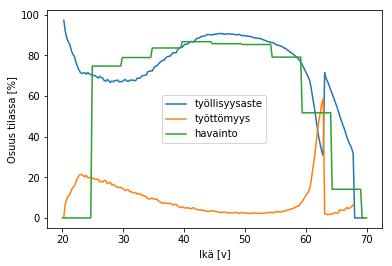

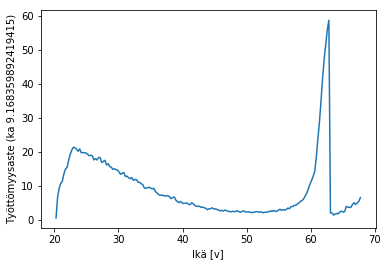

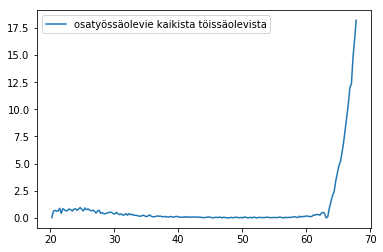

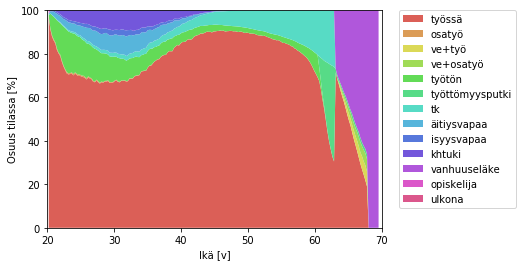

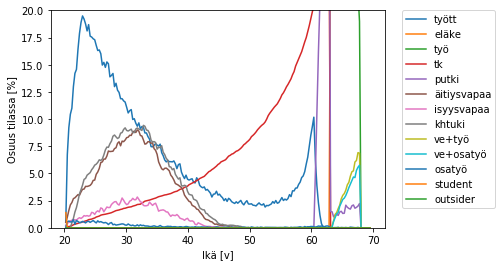

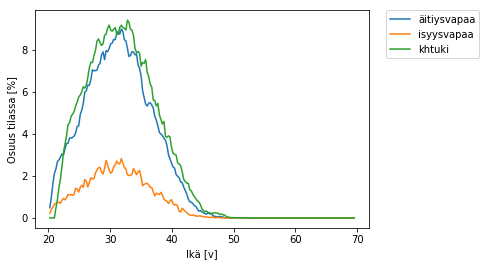

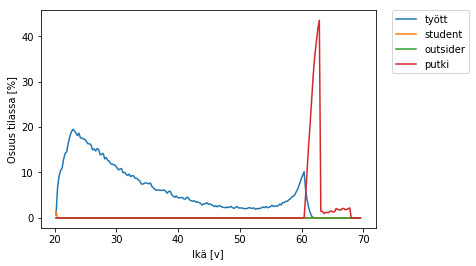

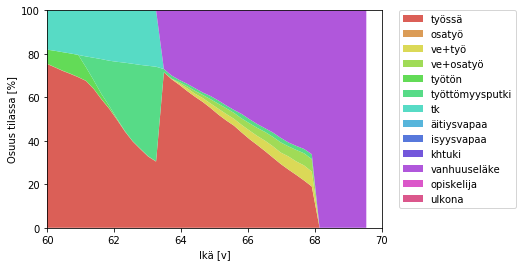

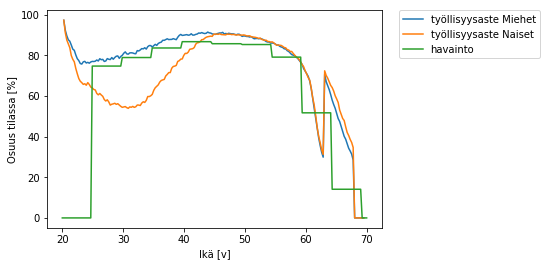

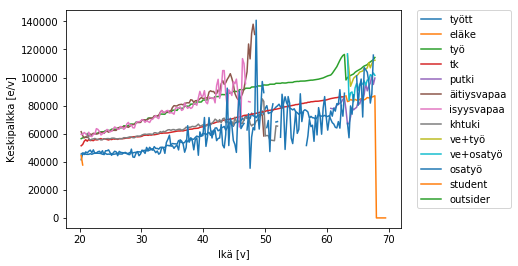

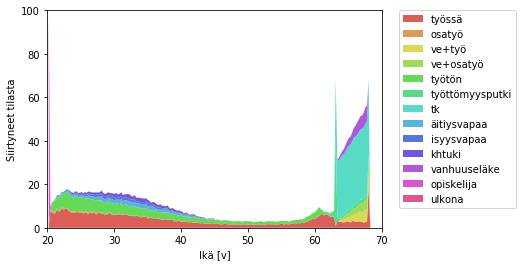

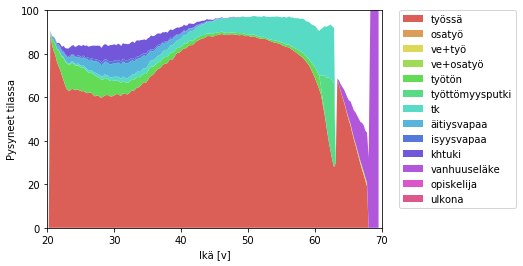

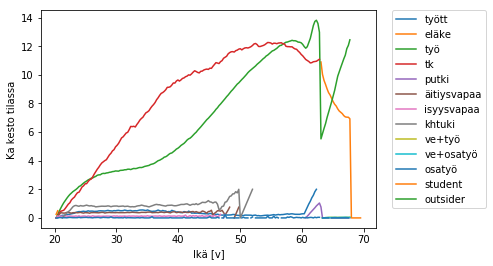

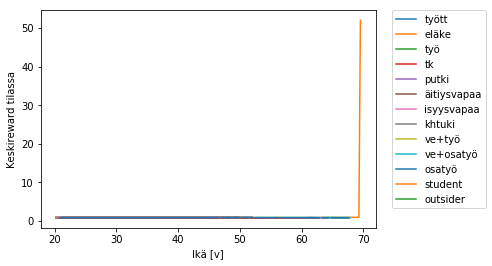

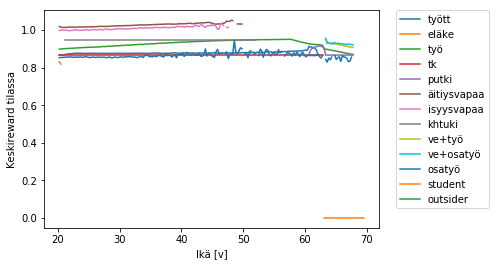

No handles with labels found to put in legend.


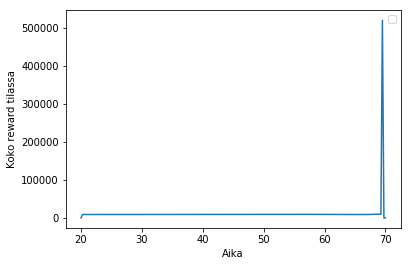

Yhteensä reward 237.0694247874033


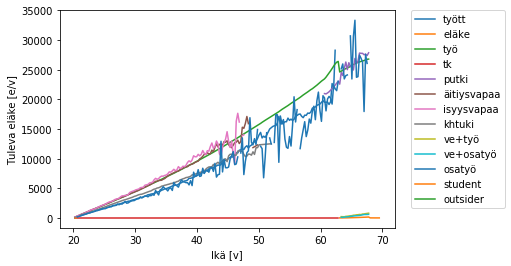

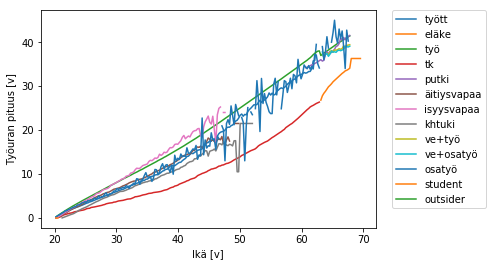

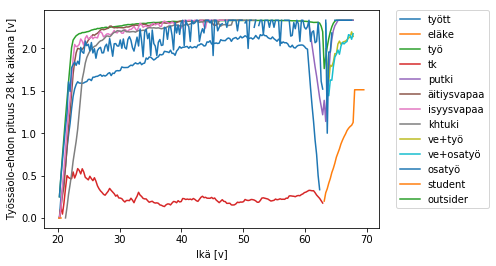

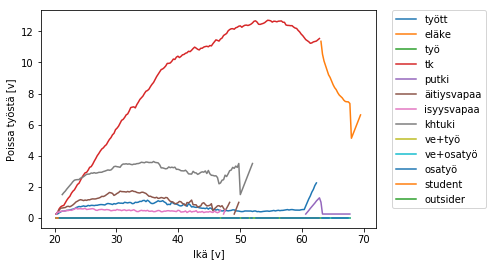

In [4]:
cc1.render(load='results/perus_results2')

# Porrastettu työttömyysturva



No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.956    |
| fps                | 1073     |
| nupdates           | 1        |
| policy_entropy     | 0.802    |
| policy_loss        | -0.162   |
| total_timesteps    | 0        |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.827    |
| fps                | 1887     |
| nupdates           | 10       |
| policy_entropy     | 0.753    |
| policy_loss        | 1.29     |
| total_timesteps    | 22041    |
| value_loss         | 3.73     |
---------------------------------
---------------------------------
| explained_variance | 0.843    |
| fps                | 1716     |
| nupdates           | 20       |
| policy_entropy     | 0.613    |
| policy_loss        | -1.31    |
| total_timesteps    | 46531    |
| value_loss         | 6.88     |
------------------------

---------------------------------
| explained_variance | 0.944    |
| fps                | 1654     |
| nupdates           | 270      |
| policy_entropy     | 0.771    |
| policy_loss        | 0.691    |
| total_timesteps    | 658781   |
| value_loss         | 1.54     |
---------------------------------
---------------------------------
| explained_variance | 0.918    |
| fps                | 1656     |
| nupdates           | 280      |
| policy_entropy     | 0.744    |
| policy_loss        | 0.192    |
| total_timesteps    | 683271   |
| value_loss         | 0.626    |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 1659     |
| nupdates           | 290      |
| policy_entropy     | 0.717    |
| policy_loss        | -0.644   |
| total_timesteps    | 707761   |
| value_loss         | 1.57     |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1693     |
| nupdates           | 540      |
| policy_entropy     | 0.827    |
| policy_loss        | -0.00709 |
| total_timesteps    | 1320011  |
| value_loss         | 0.338    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 1693     |
| nupdates           | 550      |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0722   |
| total_timesteps    | 1344501  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1694     |
| nupdates           | 560      |
| policy_entropy     | 0.798    |
| policy_loss        | -0.116   |
| total_timesteps    | 1368991  |
| value_loss         | 0.447    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.914    |
| fps                | 1707     |
| nupdates           | 810      |
| policy_entropy     | 0.799    |
| policy_loss        | -0.0382  |
| total_timesteps    | 1981241  |
| value_loss         | 0.564    |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 1708     |
| nupdates           | 820      |
| policy_entropy     | 0.788    |
| policy_loss        | -0.0708  |
| total_timesteps    | 2005731  |
| value_loss         | 0.764    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1708     |
| nupdates           | 830      |
| policy_entropy     | 0.728    |
| policy_loss        | 0.0848   |
| total_timesteps    | 2030221  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1715     |
| nupdates           | 1080     |
| policy_entropy     | 0.75     |
| policy_loss        | 0.119    |
| total_timesteps    | 2642471  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1716     |
| nupdates           | 1090     |
| policy_entropy     | 0.732    |
| policy_loss        | -0.04    |
| total_timesteps    | 2666961  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1716     |
| nupdates           | 1100     |
| policy_entropy     | 0.711    |
| policy_loss        | 0.12     |
| total_timesteps    | 2691451  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1720     |
| nupdates           | 1350     |
| policy_entropy     | 0.713    |
| policy_loss        | -0.0424  |
| total_timesteps    | 3303701  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1721     |
| nupdates           | 1360     |
| policy_entropy     | 0.699    |
| policy_loss        | -0.0647  |
| total_timesteps    | 3328191  |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1721     |
| nupdates           | 1370     |
| policy_entropy     | 0.816    |
| policy_loss        | -0.129   |
| total_timesteps    | 3352681  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 1724     |
| nupdates           | 1620     |
| policy_entropy     | 0.704    |
| policy_loss        | -0.034   |
| total_timesteps    | 3964931  |
| value_loss         | 0.393    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1724     |
| nupdates           | 1630     |
| policy_entropy     | 0.734    |
| policy_loss        | 0.307    |
| total_timesteps    | 3989421  |
| value_loss         | 0.575    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1725     |
| nupdates           | 1640     |
| policy_entropy     | 0.79     |
| policy_loss        | -0.207   |
| total_timesteps    | 4013911  |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1727     |
| nupdates           | 1890     |
| policy_entropy     | 0.77     |
| policy_loss        | -0.0768  |
| total_timesteps    | 4626161  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1727     |
| nupdates           | 1900     |
| policy_entropy     | 0.779    |
| policy_loss        | -0.0275  |
| total_timesteps    | 4650651  |
| value_loss         | 0.416    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1728     |
| nupdates           | 1910     |
| policy_entropy     | 0.814    |
| policy_loss        | -0.0311  |
| total_timesteps    | 4675141  |
| value_loss         | 0.403    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 1730     |
| nupdates           | 2160     |
| policy_entropy     | 0.803    |
| policy_loss        | -0.0483  |
| total_timesteps    | 5287391  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1730     |
| nupdates           | 2170     |
| policy_entropy     | 0.853    |
| policy_loss        | -0.0441  |
| total_timesteps    | 5311881  |
| value_loss         | 0.527    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1730     |
| nupdates           | 2180     |
| policy_entropy     | 0.752    |
| policy_loss        | -0.0919  |
| total_timesteps    | 5336371  |
| value_loss         | 0.365    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1726     |
| nupdates           | 2430     |
| policy_entropy     | 0.757    |
| policy_loss        | -0.102   |
| total_timesteps    | 5948621  |
| value_loss         | 0.393    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1725     |
| nupdates           | 2440     |
| policy_entropy     | 0.701    |
| policy_loss        | 0.0194   |
| total_timesteps    | 5973111  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 1724     |
| nupdates           | 2450     |
| policy_entropy     | 0.704    |
| policy_loss        | 0.00643  |
| total_timesteps    | 5997601  |
| value_loss         | 0.644    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 1709     |
| nupdates           | 2700     |
| policy_entropy     | 0.777    |
| policy_loss        | -0.132   |
| total_timesteps    | 6609851  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1708     |
| nupdates           | 2710     |
| policy_entropy     | 0.751    |
| policy_loss        | 0.158    |
| total_timesteps    | 6634341  |
| value_loss         | 0.322    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1707     |
| nupdates           | 2720     |
| policy_entropy     | 0.71     |
| policy_loss        | -0.0148  |
| total_timesteps    | 6658831  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 1709     |
| nupdates           | 2970     |
| policy_entropy     | 0.781    |
| policy_loss        | -0.0151  |
| total_timesteps    | 7271081  |
| value_loss         | 0.446    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1709     |
| nupdates           | 2980     |
| policy_entropy     | 0.698    |
| policy_loss        | 0.0728   |
| total_timesteps    | 7295571  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1709     |
| nupdates           | 2990     |
| policy_entropy     | 0.717    |
| policy_loss        | 0.0152   |
| total_timesteps    | 7320061  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1710     |
| nupdates           | 3240     |
| policy_entropy     | 0.75     |
| policy_loss        | 0.0107   |
| total_timesteps    | 7932311  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1710     |
| nupdates           | 3250     |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0695   |
| total_timesteps    | 7956801  |
| value_loss         | 0.392    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1710     |
| nupdates           | 3260     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.0602  |
| total_timesteps    | 7981291  |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 1708     |
| nupdates           | 3510     |
| policy_entropy     | 0.773    |
| policy_loss        | -0.0267  |
| total_timesteps    | 8593541  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1707     |
| nupdates           | 3520     |
| policy_entropy     | 0.762    |
| policy_loss        | 0.0269   |
| total_timesteps    | 8618031  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1707     |
| nupdates           | 3530     |
| policy_entropy     | 0.774    |
| policy_loss        | 0.0308   |
| total_timesteps    | 8642521  |
| value_loss         | 0.312    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.944    |
| fps                | 1702     |
| nupdates           | 3780     |
| policy_entropy     | 0.846    |
| policy_loss        | -0.0245  |
| total_timesteps    | 9254771  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1702     |
| nupdates           | 3790     |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0419   |
| total_timesteps    | 9279261  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1702     |
| nupdates           | 3800     |
| policy_entropy     | 0.824    |
| policy_loss        | -0.0545  |
| total_timesteps    | 9303751  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 1693     |
| nupdates           | 4050     |
| policy_entropy     | 0.692    |
| policy_loss        | 0.0348   |
| total_timesteps    | 9916001  |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1692     |
| nupdates           | 4060     |
| policy_entropy     | 0.763    |
| policy_loss        | -0.028   |
| total_timesteps    | 9940491  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1692     |
| nupdates           | 4070     |
| policy_entropy     | 0.731    |
| policy_loss        | 0.0289   |
| total_timesteps    | 9964981  |
| value_loss         | 0.275    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

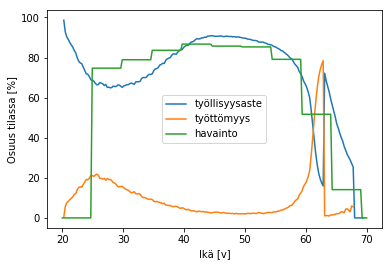

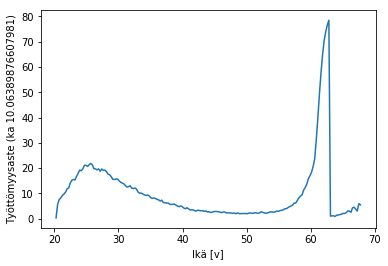

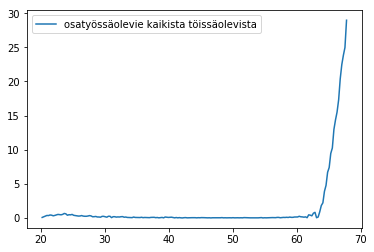

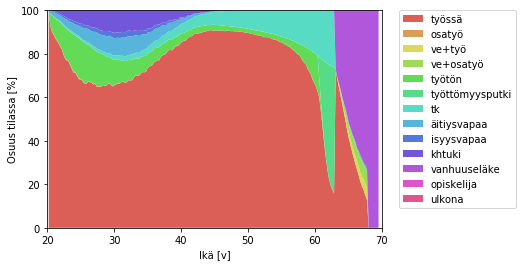

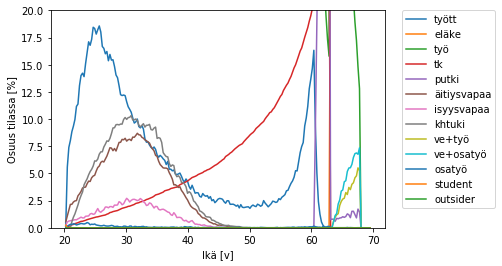

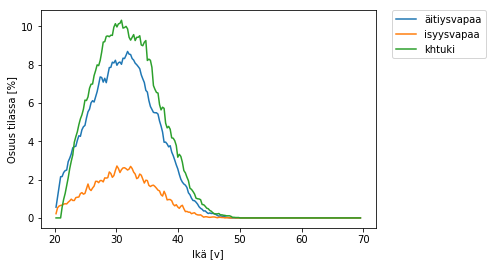

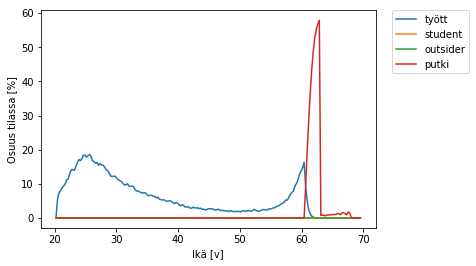

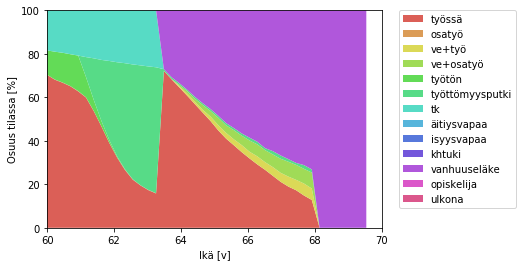

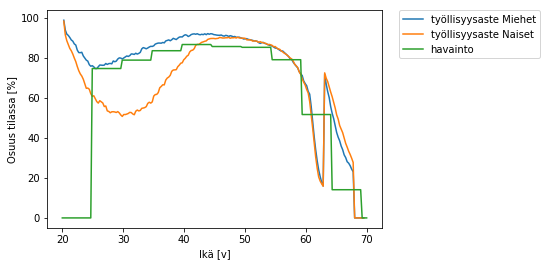

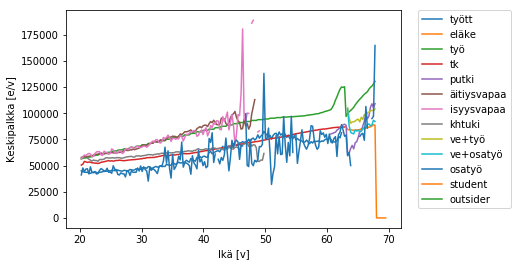

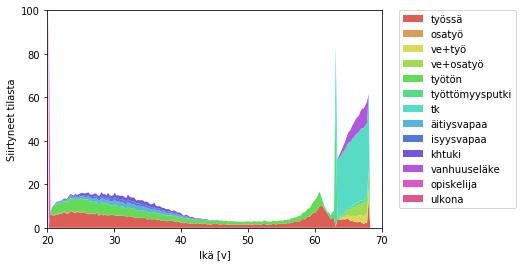

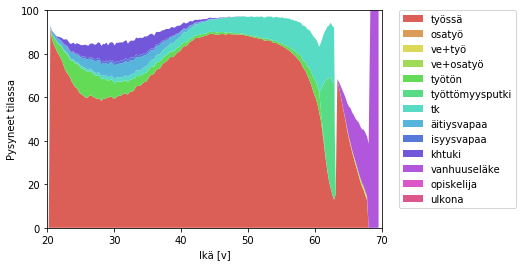

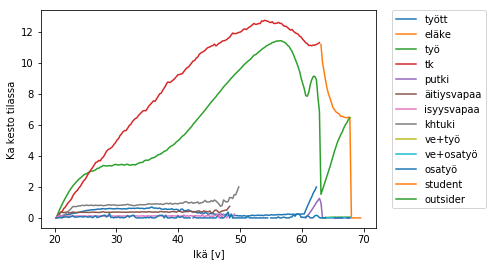

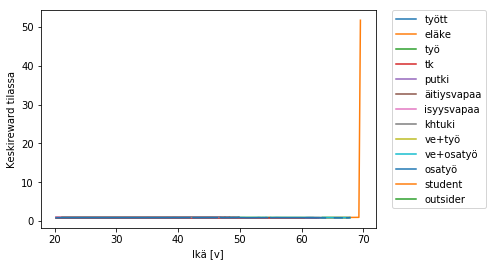

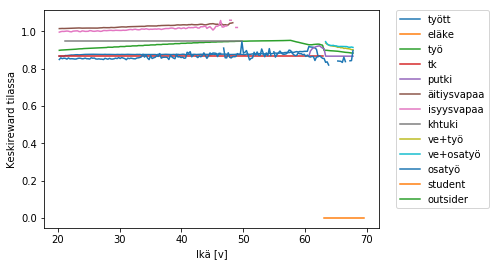

No handles with labels found to put in legend.


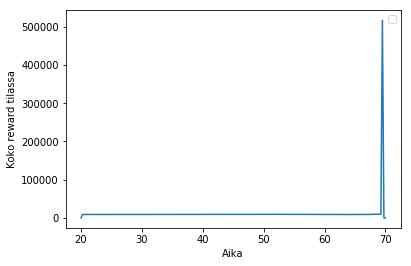

Yhteensä reward 236.8986874090993


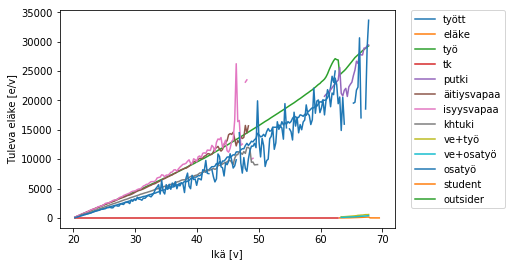

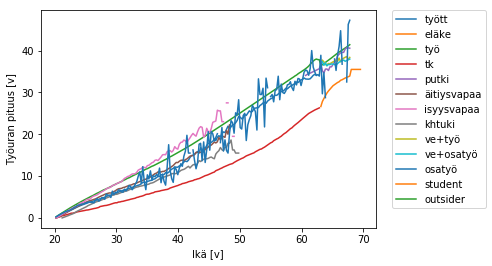

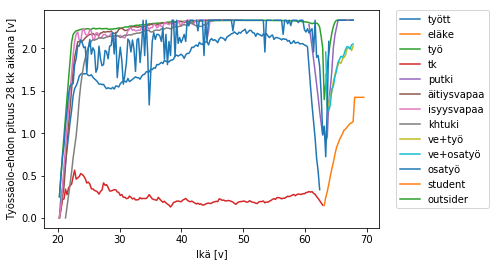

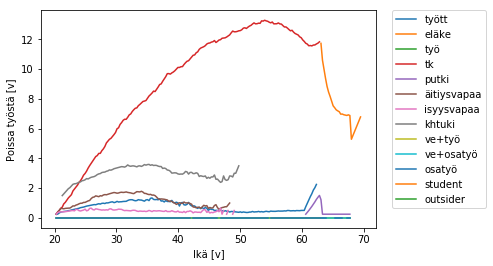

In [ ]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


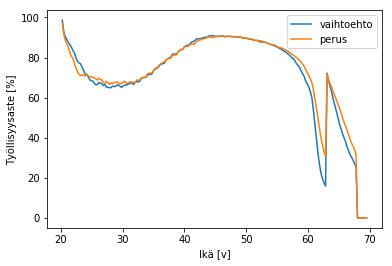

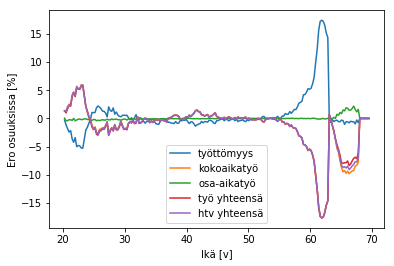

Työllisyysvaikutus 30-63-vuotiaisiin noin -29937.0 htv ja -30386.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -4.121627762186408 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.128516716253587


In [ ]:
cc2_porras.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.966    |
| fps                | 1280     |
| nupdates           | 1        |
| policy_entropy     | 0.767    |
| policy_loss        | 0.054    |
| total_timesteps    | 0        |
| value_loss         | 0.546    |
---------------------------------
---------------------------------
| explained_variance | 0.888    |
| fps                | 2142     |
| nupdates           | 10       |
| policy_entropy     | 0.493    |
| policy_loss        | 0.102    |
| total_timesteps    | 22041    |
| value_loss         | 2.28     |
---------------------------------
---------------------------------
| explained_variance | 0.891    |
| fps                | 1924     |
| nupdates           | 20       |
| policy_entropy     | 0.413    |
| policy_loss        | 0.236    |
| total_timesteps    | 46531    |
| value_loss         | 1.69     |
------------------------

---------------------------------
| explained_variance | 0.963    |
| fps                | 1721     |
| nupdates           | 270      |
| policy_entropy     | 0.748    |
| policy_loss        | -0.107   |
| total_timesteps    | 658781   |
| value_loss         | 0.504    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1713     |
| nupdates           | 280      |
| policy_entropy     | 0.772    |
| policy_loss        | 0.342    |
| total_timesteps    | 683271   |
| value_loss         | 0.865    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1706     |
| nupdates           | 290      |
| policy_entropy     | 0.76     |
| policy_loss        | -0.269   |
| total_timesteps    | 707761   |
| value_loss         | 0.5      |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1630     |
| nupdates           | 540      |
| policy_entropy     | 0.789    |
| policy_loss        | -0.0794  |
| total_timesteps    | 1320011  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1630     |
| nupdates           | 550      |
| policy_entropy     | 0.778    |
| policy_loss        | 0.163    |
| total_timesteps    | 1344501  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 1629     |
| nupdates           | 560      |
| policy_entropy     | 0.832    |
| policy_loss        | -0.182   |
| total_timesteps    | 1368991  |
| value_loss         | 0.552    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1649     |
| nupdates           | 810      |
| policy_entropy     | 0.816    |
| policy_loss        | -0.149   |
| total_timesteps    | 1981241  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 1650     |
| nupdates           | 820      |
| policy_entropy     | 0.824    |
| policy_loss        | -0.159   |
| total_timesteps    | 2005731  |
| value_loss         | 0.863    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1651     |
| nupdates           | 830      |
| policy_entropy     | 0.779    |
| policy_loss        | 0.0145   |
| total_timesteps    | 2030221  |
| value_loss         | 0.476    |
---------------------------------
---------------------------------
| explained_variance | 0.917    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 1669     |
| nupdates           | 1080     |
| policy_entropy     | 0.726    |
| policy_loss        | 0.039    |
| total_timesteps    | 2642471  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1669     |
| nupdates           | 1090     |
| policy_entropy     | 0.811    |
| policy_loss        | 0.0693   |
| total_timesteps    | 2666961  |
| value_loss         | 0.433    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1670     |
| nupdates           | 1100     |
| policy_entropy     | 0.786    |
| policy_loss        | -0.0332  |
| total_timesteps    | 2691451  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 1681     |
| nupdates           | 1350     |
| policy_entropy     | 0.769    |
| policy_loss        | 0.0291   |
| total_timesteps    | 3303701  |
| value_loss         | 0.504    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1681     |
| nupdates           | 1360     |
| policy_entropy     | 0.818    |
| policy_loss        | -0.173   |
| total_timesteps    | 3328191  |
| value_loss         | 0.545    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1682     |
| nupdates           | 1370     |
| policy_entropy     | 0.778    |
| policy_loss        | -0.0387  |
| total_timesteps    | 3352681  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.942    |
| fps                | 1690     |
| nupdates           | 1620     |
| policy_entropy     | 0.771    |
| policy_loss        | 0.0177   |
| total_timesteps    | 3964931  |
| value_loss         | 0.57     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1690     |
| nupdates           | 1630     |
| policy_entropy     | 0.808    |
| policy_loss        | -0.0743  |
| total_timesteps    | 3989421  |
| value_loss         | 0.362    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1690     |
| nupdates           | 1640     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.0446   |
| total_timesteps    | 4013911  |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps         

---------------------------------
| explained_variance | 0.942    |
| fps                | 1697     |
| nupdates           | 1890     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.0555  |
| total_timesteps    | 4626161  |
| value_loss         | 0.783    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 1697     |
| nupdates           | 1900     |
| policy_entropy     | 0.776    |
| policy_loss        | -0.0316  |
| total_timesteps    | 4650651  |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1697     |
| nupdates           | 1910     |
| policy_entropy     | 0.707    |
| policy_loss        | 0.0363   |
| total_timesteps    | 4675141  |
| value_loss         | 0.36     |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1702     |
| nupdates           | 2160     |
| policy_entropy     | 0.848    |
| policy_loss        | -0.0113  |
| total_timesteps    | 5287391  |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1702     |
| nupdates           | 2170     |
| policy_entropy     | 0.793    |
| policy_loss        | -0.0577  |
| total_timesteps    | 5311881  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1702     |
| nupdates           | 2180     |
| policy_entropy     | 0.841    |
| policy_loss        | 0.08     |
| total_timesteps    | 5336371  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1706     |
| nupdates           | 2430     |
| policy_entropy     | 0.789    |
| policy_loss        | 0.108    |
| total_timesteps    | 5948621  |
| value_loss         | 0.329    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 1706     |
| nupdates           | 2440     |
| policy_entropy     | 0.736    |
| policy_loss        | -0.201   |
| total_timesteps    | 5973111  |
| value_loss         | 0.59     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1706     |
| nupdates           | 2450     |
| policy_entropy     | 0.763    |
| policy_loss        | 0.0453   |
| total_timesteps    | 5997601  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 1709     |
| nupdates           | 2700     |
| policy_entropy     | 0.687    |
| policy_loss        | 0.0644   |
| total_timesteps    | 6609851  |
| value_loss         | 0.641    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1709     |
| nupdates           | 2710     |
| policy_entropy     | 0.712    |
| policy_loss        | 0.000165 |
| total_timesteps    | 6634341  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.918    |
| fps                | 1709     |
| nupdates           | 2720     |
| policy_entropy     | 0.751    |
| policy_loss        | -0.0257  |
| total_timesteps    | 6658831  |
| value_loss         | 0.508    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1700     |
| nupdates           | 2970     |
| policy_entropy     | 0.712    |
| policy_loss        | 0.0202   |
| total_timesteps    | 7271081  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 1699     |
| nupdates           | 2980     |
| policy_entropy     | 0.702    |
| policy_loss        | -0.123   |
| total_timesteps    | 7295571  |
| value_loss         | 0.695    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1698     |
| nupdates           | 2990     |
| policy_entropy     | 0.774    |
| policy_loss        | 0.0905   |
| total_timesteps    | 7320061  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1687     |
| nupdates           | 3240     |
| policy_entropy     | 0.701    |
| policy_loss        | 0.0939   |
| total_timesteps    | 7932311  |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 1687     |
| nupdates           | 3250     |
| policy_entropy     | 0.766    |
| policy_loss        | -0.207   |
| total_timesteps    | 7956801  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1687     |
| nupdates           | 3260     |
| policy_entropy     | 0.733    |
| policy_loss        | -0.00603 |
| total_timesteps    | 7981291  |
| value_loss         | 0.487    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1685     |
| nupdates           | 3510     |
| policy_entropy     | 0.823    |
| policy_loss        | -0.00182 |
| total_timesteps    | 8593541  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1684     |
| nupdates           | 3520     |
| policy_entropy     | 0.752    |
| policy_loss        | -0.0499  |
| total_timesteps    | 8618031  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1684     |
| nupdates           | 3530     |
| policy_entropy     | 0.701    |
| policy_loss        | -0.00454 |
| total_timesteps    | 8642521  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1678     |
| nupdates           | 3780     |
| policy_entropy     | 0.675    |
| policy_loss        | -0.00868 |
| total_timesteps    | 9254771  |
| value_loss         | 0.314    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1678     |
| nupdates           | 3790     |
| policy_entropy     | 0.623    |
| policy_loss        | 0.108    |
| total_timesteps    | 9279261  |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1678     |
| nupdates           | 3800     |
| policy_entropy     | 0.803    |
| policy_loss        | 0.0162   |
| total_timesteps    | 9303751  |
| value_loss         | 0.277    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 1671     |
| nupdates           | 4050     |
| policy_entropy     | 0.745    |
| policy_loss        | -0.0907  |
| total_timesteps    | 9916001  |
| value_loss         | 0.367    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1670     |
| nupdates           | 4060     |
| policy_entropy     | 0.769    |
| policy_loss        | 0.0148   |
| total_timesteps    | 9940491  |
| value_loss         | 0.595    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1670     |
| nupdates           | 4070     |
| policy_entropy     | 0.757    |
| policy_loss        | 0.0704   |
| total_timesteps    | 9964981  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1661     |
| nupdates           | 4320     |
| policy_entropy     | 0.807    |
| policy_loss        | -0.127   |
| total_timesteps    | 10577231 |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.842    |
| fps                | 1661     |
| nupdates           | 4330     |
| policy_entropy     | 0.724    |
| policy_loss        | -0.00574 |
| total_timesteps    | 10601721 |
| value_loss         | 0.653    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1661     |
| nupdates           | 4340     |
| policy_entropy     | 0.771    |
| policy_loss        | -0.00145 |
| total_timesteps    | 10626211 |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 1650     |
| nupdates           | 4590     |
| policy_entropy     | 0.77     |
| policy_loss        | 0.0197   |
| total_timesteps    | 11238461 |
| value_loss         | 0.182    |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 1650     |
| nupdates           | 4600     |
| policy_entropy     | 0.771    |
| policy_loss        | -0.0251  |
| total_timesteps    | 11262951 |
| value_loss         | 0.635    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1649     |
| nupdates           | 4610     |
| policy_entropy     | 0.738    |
| policy_loss        | 0.0669   |
| total_timesteps    | 11287441 |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1636     |
| nupdates           | 4860     |
| policy_entropy     | 0.77     |
| policy_loss        | 0.0386   |
| total_timesteps    | 11899691 |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1635     |
| nupdates           | 4870     |
| policy_entropy     | 0.775    |
| policy_loss        | 0.0939   |
| total_timesteps    | 11924181 |
| value_loss         | 0.222    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1635     |
| nupdates           | 4880     |
| policy_entropy     | 0.776    |
| policy_loss        | 0.0469   |
| total_timesteps    | 11948671 |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.941    |
| fps                | 1618     |
| nupdates           | 5130     |
| policy_entropy     | 0.75     |
| policy_loss        | -0.149   |
| total_timesteps    | 12560921 |
| value_loss         | 0.616    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1617     |
| nupdates           | 5140     |
| policy_entropy     | 0.738    |
| policy_loss        | -0.0253  |
| total_timesteps    | 12585411 |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 1616     |
| nupdates           | 5150     |
| policy_entropy     | 0.74     |
| policy_loss        | -0.0259  |
| total_timesteps    | 12609901 |
| value_loss         | 0.542    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1592     |
| nupdates           | 5400     |
| policy_entropy     | 0.75     |
| policy_loss        | -0.0785  |
| total_timesteps    | 13222151 |
| value_loss         | 0.599    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1592     |
| nupdates           | 5410     |
| policy_entropy     | 0.679    |
| policy_loss        | -0.0198  |
| total_timesteps    | 13246641 |
| value_loss         | 0.428    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 1592     |
| nupdates           | 5420     |
| policy_entropy     | 0.769    |
| policy_loss        | 0.0645   |
| total_timesteps    | 13271131 |
| value_loss         | 0.49     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 1576     |
| nupdates           | 5670     |
| policy_entropy     | 0.768    |
| policy_loss        | -0.0617  |
| total_timesteps    | 13883381 |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1575     |
| nupdates           | 5680     |
| policy_entropy     | 0.823    |
| policy_loss        | -0.133   |
| total_timesteps    | 13907871 |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1575     |
| nupdates           | 5690     |
| policy_entropy     | 0.793    |
| policy_loss        | 0.163    |
| total_timesteps    | 13932361 |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 1557     |
| nupdates           | 5940     |
| policy_entropy     | 0.825    |
| policy_loss        | -0.106   |
| total_timesteps    | 14544611 |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1557     |
| nupdates           | 5950     |
| policy_entropy     | 0.723    |
| policy_loss        | 0.0269   |
| total_timesteps    | 14569101 |
| value_loss         | 0.579    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 1556     |
| nupdates           | 5960     |
| policy_entropy     | 0.805    |
| policy_loss        | 0.00945  |
| total_timesteps    | 14593591 |
| value_loss         | 0.644    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

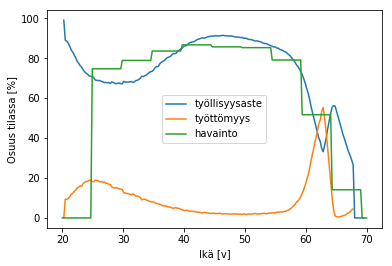

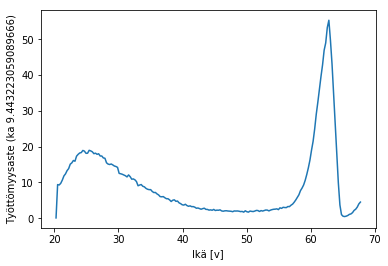

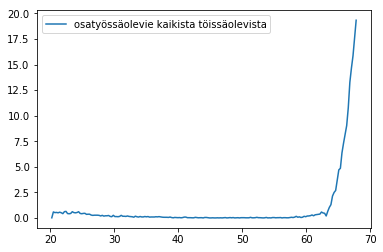

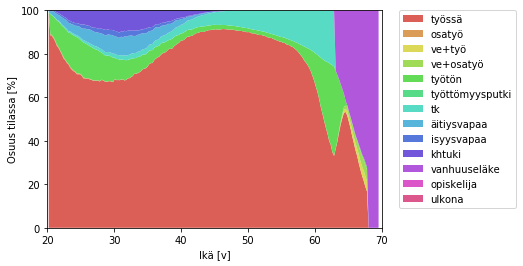

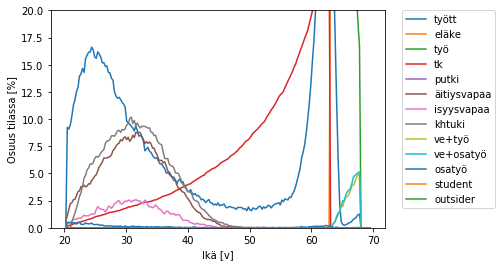

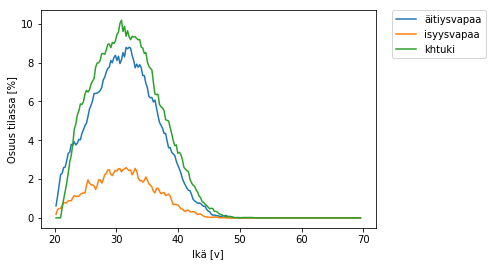

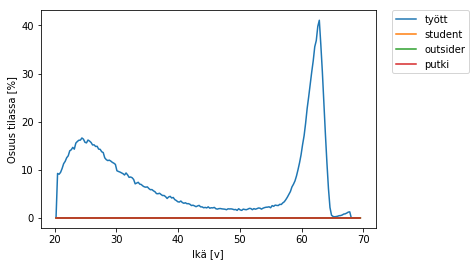

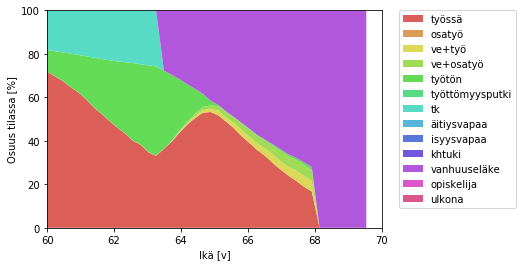

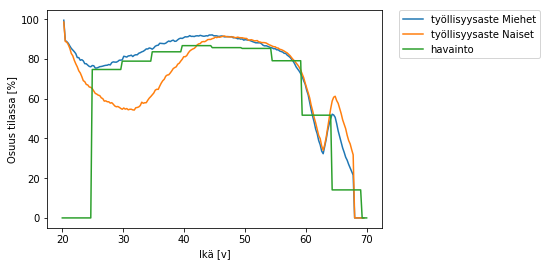

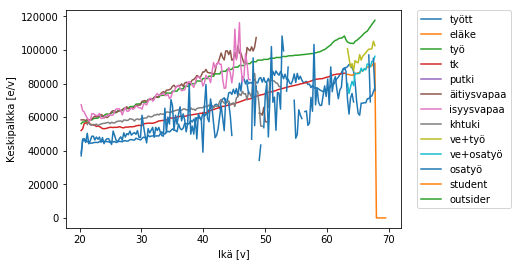

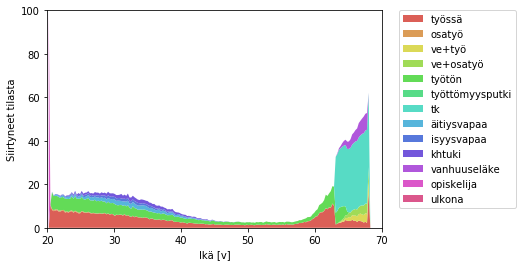

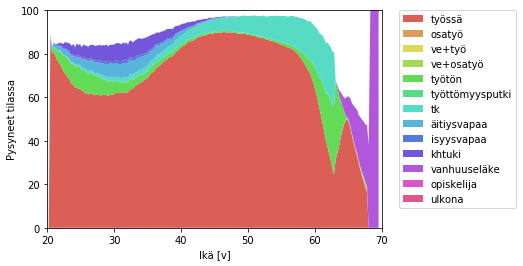

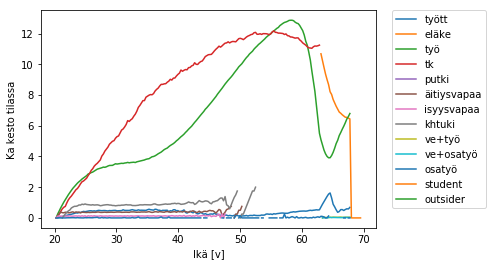

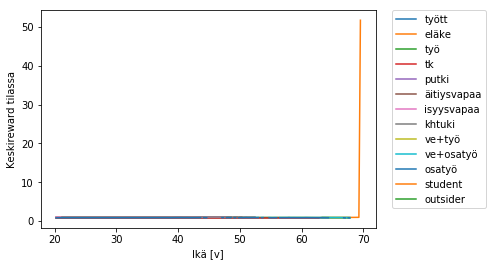

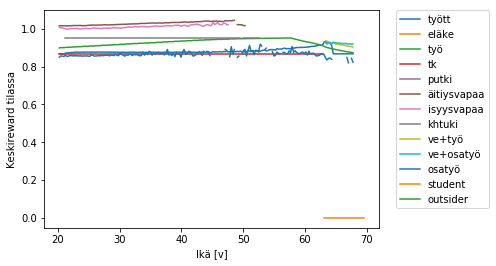

No handles with labels found to put in legend.


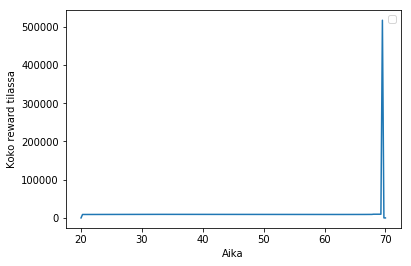

Yhteensä reward 236.845091394512


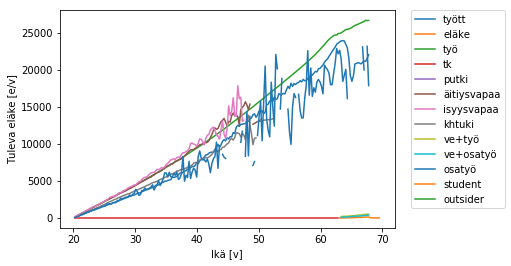

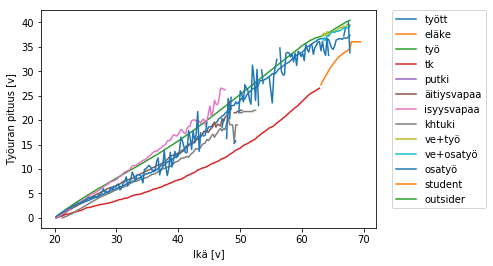

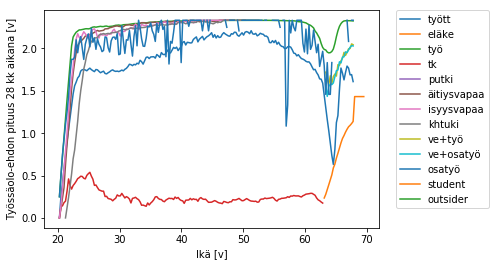

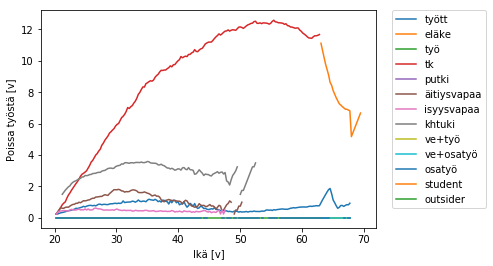

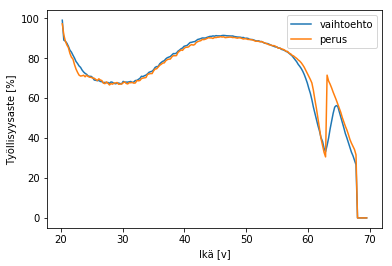

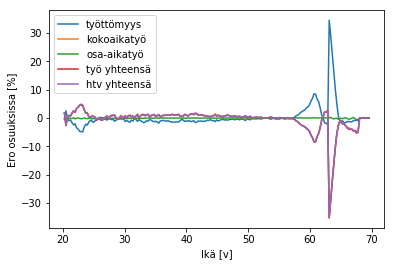

Työllisyysvaikutus 30-63-vuotiaisiin noin -1836.0 htv ja -2241.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -0.3039744558368973 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10958060102931008


In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps,twostage=twostage)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

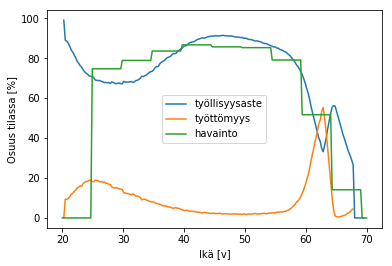

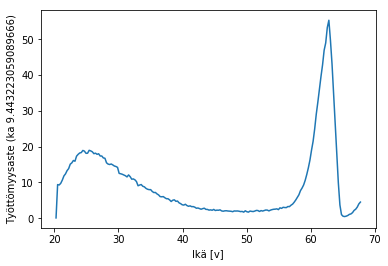

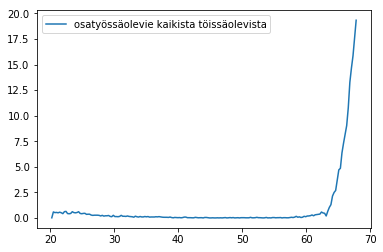

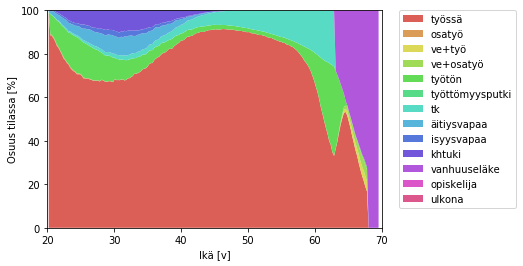

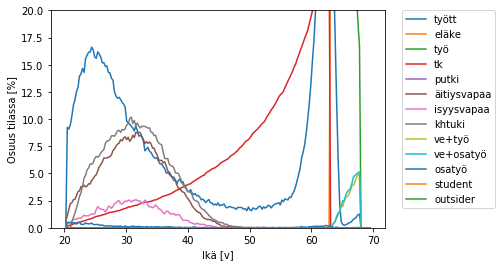

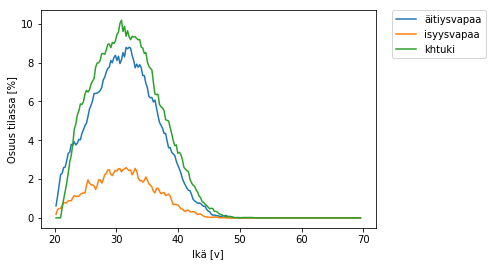

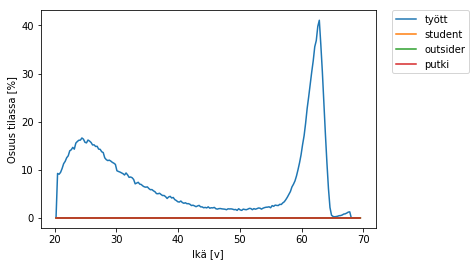

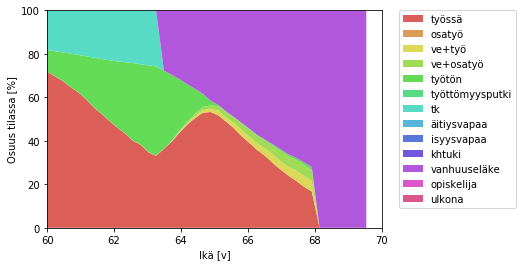

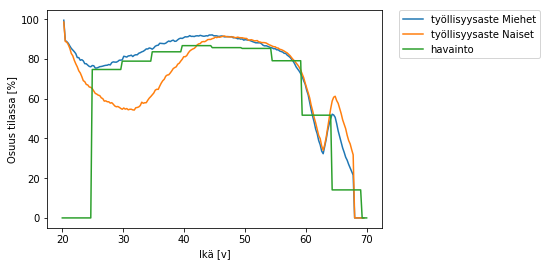

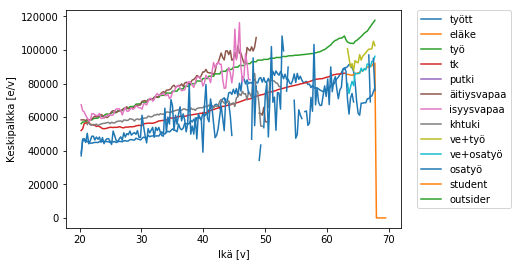

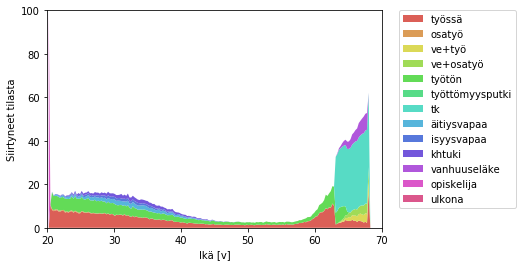

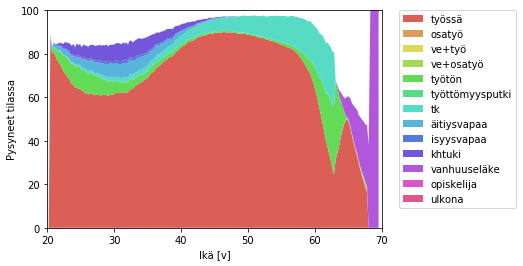

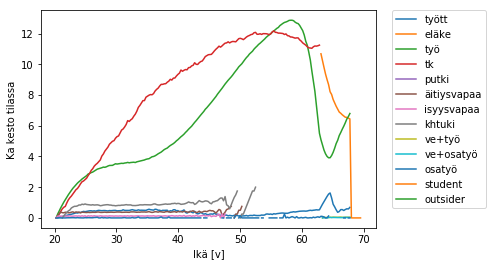

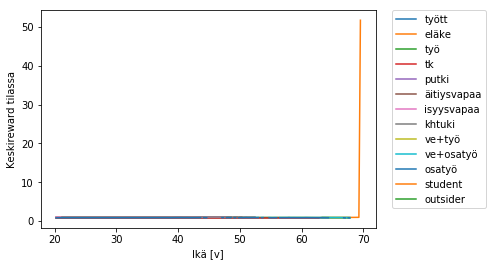

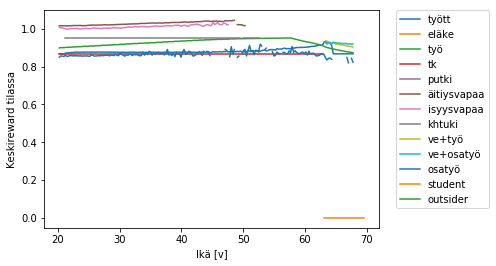

No handles with labels found to put in legend.


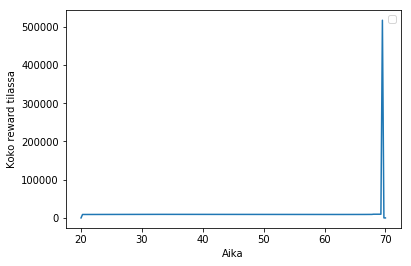

Yhteensä reward 236.845091394512


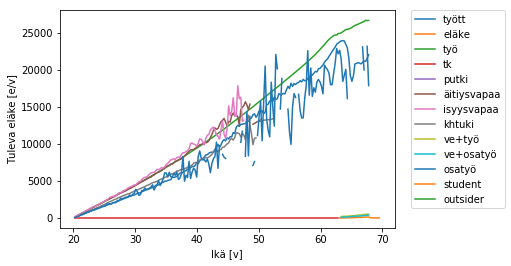

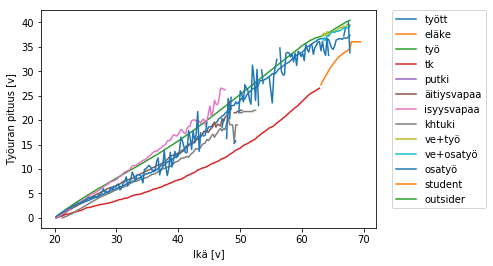

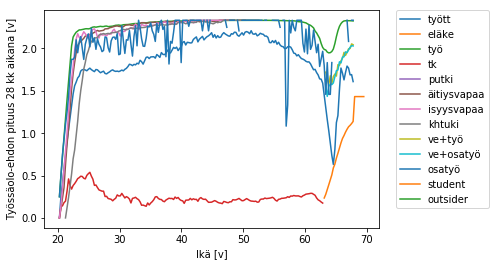

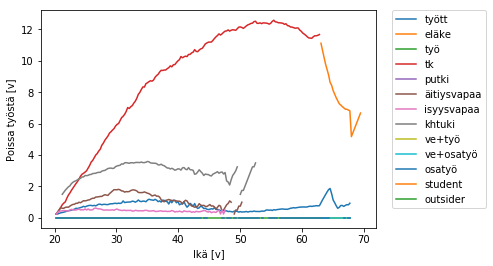

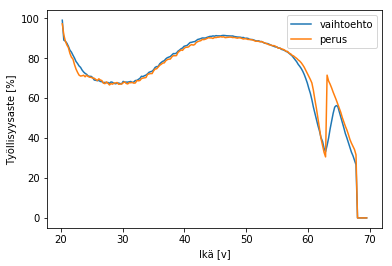

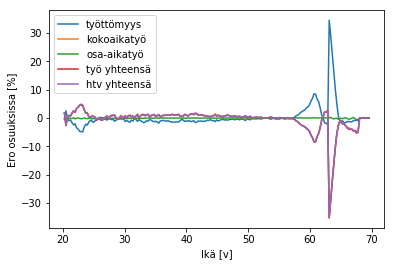

Työllisyysvaikutus 30-63-vuotiaisiin noin -1836.0 htv ja -2241.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -0.3039744558368973 prosenttia
Epävarmuus työllisyysasteissa 0.0196, hajonta 0.10958060102931008


In [ ]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.979    |
| fps                | 1229     |
| nupdates           | 1        |
| policy_entropy     | 0.771    |
| policy_loss        | -0.0889  |
| total_timesteps    | 0        |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 2206     |
| nupdates           | 10       |
| policy_entropy     | 0.819    |
| policy_loss        | 1.1      |
| total_timesteps    | 22041    |
| value_loss         | 2.76     |
---------------------------------
---------------------------------
| explained_variance | 0.783    |
| fps                | 1943     |
| nupdates           | 20       |
| policy_entropy     | 0.754    |
| policy_loss        | -1.97    |
| total_timesteps    | 46531    |
| value_loss         | 8.69     |
------------------------

---------------------------------
| explained_variance | 0.881    |
| fps                | 1741     |
| nupdates           | 270      |
| policy_entropy     | 0.768    |
| policy_loss        | 0.222    |
| total_timesteps    | 658781   |
| value_loss         | 1.04     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1740     |
| nupdates           | 280      |
| policy_entropy     | 0.749    |
| policy_loss        | 0.419    |
| total_timesteps    | 683271   |
| value_loss         | 1.18     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 1739     |
| nupdates           | 290      |
| policy_entropy     | 0.793    |
| policy_loss        | -0.459   |
| total_timesteps    | 707761   |
| value_loss         | 0.879    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1730     |
| nupdates           | 540      |
| policy_entropy     | 0.753    |
| policy_loss        | -0.0122  |
| total_timesteps    | 1320011  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1726     |
| nupdates           | 550      |
| policy_entropy     | 0.838    |
| policy_loss        | -0.181   |
| total_timesteps    | 1344501  |
| value_loss         | 0.536    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1723     |
| nupdates           | 560      |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0692   |
| total_timesteps    | 1368991  |
| value_loss         | 0.432    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 1667     |
| nupdates           | 810      |
| policy_entropy     | 0.776    |
| policy_loss        | -0.167   |
| total_timesteps    | 1981241  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1666     |
| nupdates           | 820      |
| policy_entropy     | 0.733    |
| policy_loss        | 0.059    |
| total_timesteps    | 2005731  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1664     |
| nupdates           | 830      |
| policy_entropy     | 0.785    |
| policy_loss        | 0.0274   |
| total_timesteps    | 2030221  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.941    |
| fps                | 1671     |
| nupdates           | 1080     |
| policy_entropy     | 0.672    |
| policy_loss        | 0.0978   |
| total_timesteps    | 2642471  |
| value_loss         | 0.537    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 1671     |
| nupdates           | 1090     |
| policy_entropy     | 0.68     |
| policy_loss        | 0.064    |
| total_timesteps    | 2666961  |
| value_loss         | 0.537    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1672     |
| nupdates           | 1100     |
| policy_entropy     | 0.724    |
| policy_loss        | 0.0993   |
| total_timesteps    | 2691451  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 1683     |
| nupdates           | 1350     |
| policy_entropy     | 0.714    |
| policy_loss        | 0.000547 |
| total_timesteps    | 3303701  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1684     |
| nupdates           | 1360     |
| policy_entropy     | 0.729    |
| policy_loss        | -0.0537  |
| total_timesteps    | 3328191  |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1684     |
| nupdates           | 1370     |
| policy_entropy     | 0.685    |
| policy_loss        | 0.00103  |
| total_timesteps    | 3352681  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1693     |
| nupdates           | 1620     |
| policy_entropy     | 0.781    |
| policy_loss        | -0.398   |
| total_timesteps    | 3964931  |
| value_loss         | 0.725    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 1693     |
| nupdates           | 1630     |
| policy_entropy     | 0.742    |
| policy_loss        | 0.00941  |
| total_timesteps    | 3989421  |
| value_loss         | 0.45     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 1693     |
| nupdates           | 1640     |
| policy_entropy     | 0.742    |
| policy_loss        | 0.34     |
| total_timesteps    | 4013911  |
| value_loss         | 0.618    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.94     |
| fps                | 1700     |
| nupdates           | 1890     |
| policy_entropy     | 0.72     |
| policy_loss        | -0.0221  |
| total_timesteps    | 4626161  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1700     |
| nupdates           | 1900     |
| policy_entropy     | 0.813    |
| policy_loss        | -0.0681  |
| total_timesteps    | 4650651  |
| value_loss         | 0.487    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1701     |
| nupdates           | 1910     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.0098  |
| total_timesteps    | 4675141  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1706     |
| nupdates           | 2160     |
| policy_entropy     | 0.802    |
| policy_loss        | -0.0147  |
| total_timesteps    | 5287391  |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1706     |
| nupdates           | 2170     |
| policy_entropy     | 0.745    |
| policy_loss        | 0.0772   |
| total_timesteps    | 5311881  |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1706     |
| nupdates           | 2180     |
| policy_entropy     | 0.798    |
| policy_loss        | -0.0556  |
| total_timesteps    | 5336371  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 1710     |
| nupdates           | 2430     |
| policy_entropy     | 0.837    |
| policy_loss        | -0.0539  |
| total_timesteps    | 5948621  |
| value_loss         | 0.407    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1710     |
| nupdates           | 2440     |
| policy_entropy     | 0.827    |
| policy_loss        | -0.0285  |
| total_timesteps    | 5973111  |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1710     |
| nupdates           | 2450     |
| policy_entropy     | 0.881    |
| policy_loss        | -0.134   |
| total_timesteps    | 5997601  |
| value_loss         | 0.657    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

In [ ]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

# Perustulo

Alustava versio. Tulee muuttumaan, kun mukana koko mallli.

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)